In [38]:
from numpy import *
import astropy.units as u
from astropy.constants import G, M_jup, R_jup, M_earth, R_earth, L_sun, M_sun, R_sun

[Rigliaco et al. 2012](http://adsabs.harvard.edu/abs/2012A%26A...548A..56R)

In [39]:
def line_lum(dist,zeropt,filtwid,star_mag,contr):
    """
    Given distance, flux zeropoint, stellar R-band magnitude, and H-alpha contrast (or contrast limit),
    calculate line luminosity in Watts. 
    """
    delta_mag = -2.5*log10(contr)
    L_line = 4*pi*dist**2*zeropt*filtwid*10**((star_mag+delta_mag)/-2.5)
    L_line = L_line.decompose().to(u.W)
    return(L_line)

#next two are empirical T-Tauri relationships from Rigliaco 2012

def acc_lum(L_line):
    """
    Translate H-alpha line luminosity to accretion luminosity. From empirical 
    T-Tauri relationships in Rigliaco et al. 2102
    """
    b = 2.27
    a = 1.25
    log_acc = b+a*log10(L_line/L_sun)
    L_acc=10**log_acc*L_sun
    return(L_acc)

def acc_rate(L_acc, R, M):
    """
    Translate an accretion luminosity and planet mass/radius to accretion rate in jupiter masses per year.
    Also following Rigliaco et al. 2012.
    """
    mdot = 1.25*L_acc*R/(G*M)
    mdot = mdot.decompose().to(u.Msun/u.yr)
    return(mdot)

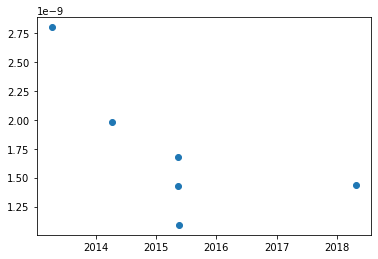

In [40]:
## check HD142527 calculation from Close et al. 2014

import pandas as pd
hd142_B = pd.read_csv('HD142527B_contrasts.csv')
mag = 8.3-1.3 #11.6-0.57
contr = hd142_B['DmagHa'].to_numpy()
dist = 159.26*u.pc
zeropt = 2.339e-5*u.erg/u.cm**2/u.s/u.um
L_line = line_lum(dist,zeropt,0.006*u.um,mag,contr)
log10(L_line/L_sun)
L_acc=acc_lum(L_line)
mdotsS=acc_rate(L_acc,0.15*R_sun,0.26*M_sun) #Claudi 2019 spectral
mdotsE=acc_rate(L_acc,1.2*R_sun,0.26*M_sun) #Claudi 2019 evol+acc 
mdotsS

#interestingly, it appears that Laird used the incorrect L_sun 
#(he used 3.28e33, but it should have been 3.85e33). Otherwise, same answer

## William: updated mag such that = Rband - assumed extinction from Close 2014
## changed acc_rate to read out in Msun/yr for lit comparison
## with more epochs can plot over time

import matplotlib.pyplot as plt
plt.scatter(hd142_B['yr'], mdotsE)

In [44]:
mdotsS

<Quantity [3.49925565e-10, 2.47126885e-10, 1.77980844e-10, 2.09932962e-10,
           1.36391826e-10, 1.79906893e-10] solMass / yr>

In [46]:
hd142 = pd.DataFrame()
hd142['Lline'] = (L_line/L_sun).value
hd142['mdotS'] = mdotsS.value
hd142['mdotE'] = mdotsE.value
hd142.to_clipboard()

In [48]:
mdotsS.min()#[3] - mdotsS[4]

<Quantity 1.36391826e-10 solMass / yr>

In [47]:
mdotsE.min()#[3] - mdotsS[4]

<Quantity 1.09113461e-09 solMass / yr>

In [22]:
print(mean(mdotsS), std(mdotsS))
print(mean(mdotsE), std(mdotsE))

2.1687749556663796e-10 solMass / yr 6.83407624160171e-11 solMass / yr
1.7350199645331037e-09 solMass / yr 5.467260993281368e-10 solMass / yr


In [12]:
import pandas as pd
mdotdf = pd.DataFrame(mdots)
mdotdf.to_clipboard()

0.00121343968724605 0.001907471334724


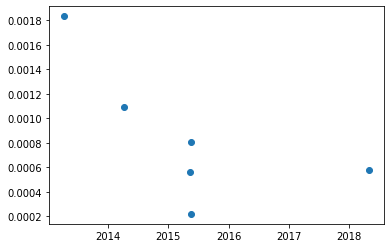

In [9]:
contmed = median(hd142_B['DmagCont'].to_numpy())
hamed = median(hd142_B['DmagHa'].to_numpy())
print(contmed, hamed)
d2Mag = hd142_B['DmagHa'].to_numpy() - contmed
plt.scatter(hd142_B['yr'], d2Mag)
# plt.ylim(0,-1.5)

In [24]:
mdots = mdotsS
print('mean is: '+str(mdots.mean()))
print('max is: '+str(mdots.max()))
print('min is: '+str(mdots.min()))
print('range is: '+str(mdots.max()-mdots.min()))

mean is: 2.1687749556663796e-10 solMass / yr
max is: 3.499255648114563e-10 solMass / yr
min is: 1.3639182588620925e-10 solMass / yr
range is: 2.1353373892524707e-10 solMass / yr


In [4]:
L_line

<Quantity 1.36718861e+22 W>

In [17]:
import numpy as np
Acc_lum = 10**(-2.9)*L_sun
Mdot = acc_rate(Acc_lum,4.6*R_jup,31*M_jup)
Mnew = Mdot.to(u.Msun/u.yr)
np.log10(Mnew.value)

-9.096596857412283

In [5]:
## Zhou 2014 results
GSC_logL = -5.03
GSC_Lacc=acc_lum(10**GSC_logL*L_sun)
GSC_Mdot = acc_rate(GSC_Lacc,1.8*R_jup,15*M_jup)
print(L_line)
print(log10(GSC_Mdot.value))

GQLup_logL = -4.69
GQLup_Lacc=acc_lum(10**GQLup_logL*L_sun)
GQLup_Mdot = acc_rate(GQLup_Lacc,4.6*R_jup,31*M_jup)
print(log10(GQLup_Mdot.value))

DHTau_logL = -6.19
DHTau_Lacc=acc_lum(10**DHTau_logL*L_sun)
DHTau_Mdot = acc_rate(DHTau_Lacc,2.7*R_jup,11*M_jup)
print(log10(DHTau_Mdot.value))

1.3671886083836084e+22 W
-7.286144871546158
-6.768929979746482
-8.425355038593022


In [6]:
#sanity check of line luminosity
GSC_Hamag = 15.7
GSC_AV = 0.2
GSC_mag = GSC_Hamag-GSC_AV
GSC_contr =  7.33e-18/7.08e-16 #from Table 1 cont/Ha flux
GSC_dist = 145*u.pc
filterwid = 18*u.AA
zeropt = 1.434e-9*u.erg/u.cm**2/u.s/u.AA #19.863 mag

GSC_L_line = line_lum(GSC_dist,zeropt,filterwid,GSC_mag,GSC_contr)
GSC_Lacc=acc_lum(GSC_L_line)
GSC_Mdot = acc_rate(GSC_Lacc,1.8*R_jup,15*M_jup)
print(log10(GSC_Mdot.value))

GQLup_Hamag = 15.9
GQLup_AV = 1.5
GQLup_mag = GQLup_Hamag-GQLup_AV
GQLup_contr = 5.03e-17/5.92e-16
GQLup_dist = 155*u.pc
GQLup_L_line = line_lum(GQLup_dist,zeropt,filterwid,GQLup_mag,GQLup_contr)
GQLup_Lacc=acc_lum(GQLup_L_line)
GQLup_Mdot = acc_rate(GQLup_Lacc,4.6*R_jup,31*M_jup)
print(log10(GQLup_Mdot.value))

DHTau_Hamag = 19
DHTau_AV = 0.7
DHTau_mag = DHTau_Hamag-DHTau_AV
DHTau_contr = 1.35e-18/3.48e-17
DHTau_dist = 145*u.pc
DHTau_L_line = line_lum(DHTau_dist,zeropt,filterwid,DHTau_mag,DHTau_contr)
DHTau_Lacc=acc_lum(DHTau_L_line)
DHTau_Mdot = acc_rate(DHTau_Lacc,2.7*R_jup,11*M_jup)
print(log10(DHTau_Mdot.value))

-9.69293561753221
-7.835592034167181
-10.065041025082742


## Potential WFIRST Filter Widths

**Filters:**
Narrowband (Hubble WFC3 F656N) 14A = 0.0014 micron
Wider (Hubble WFC3 F657N incl. [NIII]) 94A ~ 0.01 micron

**R~50 IFS**
Bandpass = 600-970nm —>  width ~ 8nm = 0.008


In [14]:
#Accreting Earth in HL Tau at contrast threshhold 1e-5

zeropt = 2.25e-5*u.erg/u.cm**2/u.s/u.um #R band Johnson zeropoint
dist = 140*u.pc
mag = 14.21
filterwid = 0.01*u.um
contrast = 1e-5

L_line = line_lum(dist,zeropt,filterwid,mag,contrast)
L_acc = acc_lum(L_line)
mdot=acc_rate(L_acc,R_earth,M_earth)
mdot.to(u.Mearth/u.yr)

<Quantity 1.57114114e-07 earthMass / yr>

<Quantity 1.57114114e-07 earthMass / yr>